### Import Libraries


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Histograms


In [23]:
titanic = pd.read_csv("2 - titanic.csv")
pd.set_option('display.max_rows', None)
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

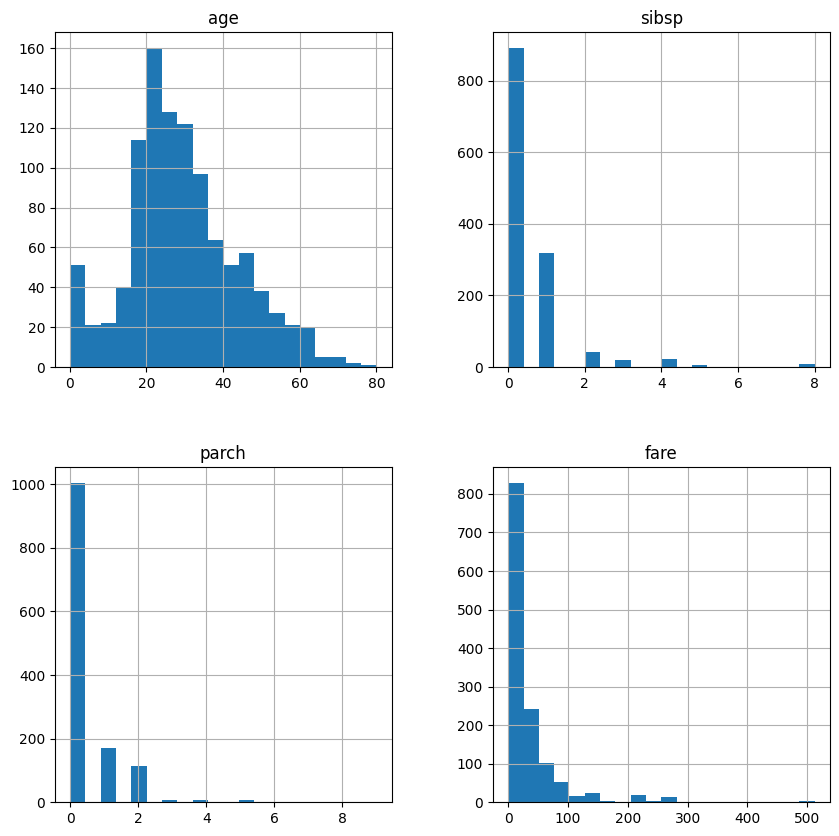

In [4]:
titanic.loc[:, ['age','sibsp', 'parch', 'fare']].hist(bins=20, figsize=(10,10))

#### Relation with Response Variable

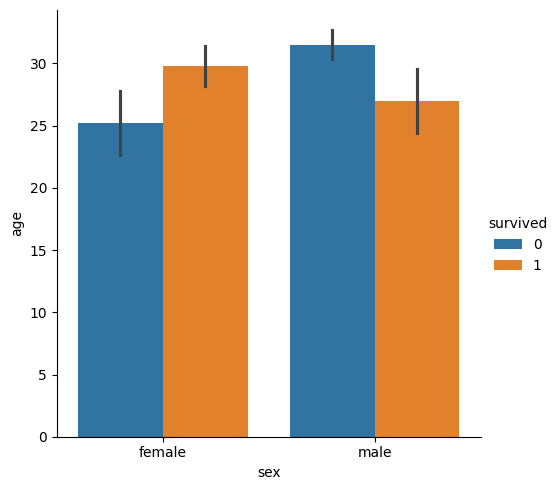

In [16]:
sns.catplot(data=titanic, kind='bar', x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

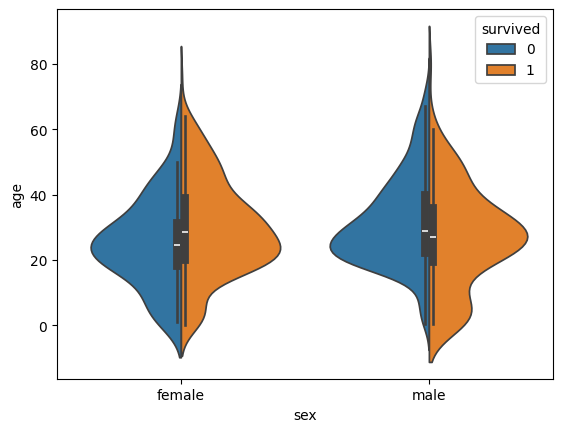

In [17]:
sns.violinplot(data=titanic, x='sex',y='age', hue='survived', split=True )

We can also visualize the relationship between the different variables by calculating their correlation

In [35]:
# titanic = titanic.drop(columns=['cabin','name','ticket','boat','body','home.dest'],inplace=True)
titanic.embarked.unique()
titanic.sex.unique()
cols = list(titanic.columns)
cols.remove('survived')
cols.insert(0,'survived')
titanic = titanic.reindex(columns=cols)

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,0,1,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,0,1,male,71.0000,0,0,49.5042,C


<Axes: >

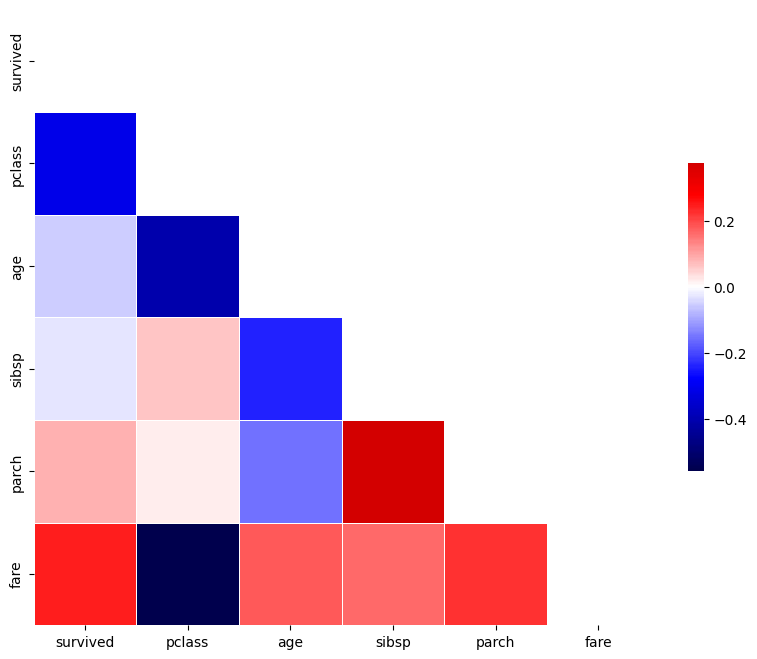

In [39]:
titanic_drop = titanic.drop(columns=['sex', 'embarked'])
corr = titanic_drop.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10,8))
sns.heatmap(corr,mask=mask, cmap='seismic', center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})